# Telecom Data Analysis and Modelling
###  Wilson adejo
###  25-10-2023


## Contents

### <a href='#1'>1. Read in the dataset</a>
             
### <a href='#2'>2. Exploration Data Analysis</a>

### <a href='#3'>3. Data Preprocessing & Feature Engineering</a>
 
### <a href='#4'>4. Data Analysis</a>
    
### <a href='#5'>5.Modelling and Evaluation</a>
      

## 1. Importing Libraries and Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp  - - Now depreciated
import ydata_profiling as pp
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

%matplotlib inline


C:\Users\HP\AppData\Local\Temp\ipykernel_19176\3515639042.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('telecom_churn.csv',skipinitialspace = True)

In [3]:
dataset.sample(7)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
237,IL,110,408,366-5780,no,no,0,74.5,117,12.67,...,98,17.07,192.2,101,8.65,9.8,7,2.65,3,False
354,MS,64,408,402-1942,yes,no,0,236.2,77,40.15,...,85,18.58,194.1,97,8.73,13.2,2,3.56,2,True
1856,CO,86,408,419-7415,no,no,0,171.8,106,29.21,...,44,25.64,139.4,108,6.27,9.7,5,2.62,1,False
1982,SD,125,415,404-9754,no,no,0,163.8,73,27.85,...,85,21.73,192.9,95,8.68,15.7,4,4.24,0,False
2784,MD,119,408,401-9665,no,no,0,239.1,88,40.65,...,79,20.70,230.9,92,10.39,10.9,3,2.94,3,True
1281,MN,109,408,414-7410,no,no,0,162.6,138,27.64,...,109,13.09,209.7,118,9.44,11.5,4,3.11,0,False
2458,LA,163,408,371-5875,no,yes,23,224.0,126,38.08,...,89,19.85,293.9,104,13.23,8.8,4,2.38,1,False


## 2. Exploartory  data Analysis
This section contain the exploratory data analysis carried out to have a general overview of the dataset. 

In [4]:
print(dataset.count())  # Count the Number of Non-Missing Values for each Variable
print(dataset.shape)
dataset.describe()      #gives the summary of all the numerical variables present in our data frame

state                     3333
account length            3333
area code                 3333
phone number              3333
international plan        3333
voice mail plan           3333
number vmail messages     3333
total day minutes         3333
total day calls           3333
total day charge          3333
total eve minutes         3333
total eve calls           3333
total eve charge          3333
total night minutes       3333
total night calls         3333
total night charge        3333
total intl minutes        3333
total intl calls          3333
total intl charge         3333
customer service calls    3333
churn                     3333
dtype: int64
(3333, 21)


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Using ProfileReport to have a quick overview of the data and save as output.html file 
#profile = pp.ProfileReport(dataset) 
#profile.to_file("output.html")
#profile

In [7]:
dataset.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
dataset.drop(['phone number','account length','area code',], inplace=True, axis=1, errors='ignore')


In [10]:
dataset.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
dataset.duplicated().sum()   #  check the duplicate in the dataset


0

In [12]:
dataset['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

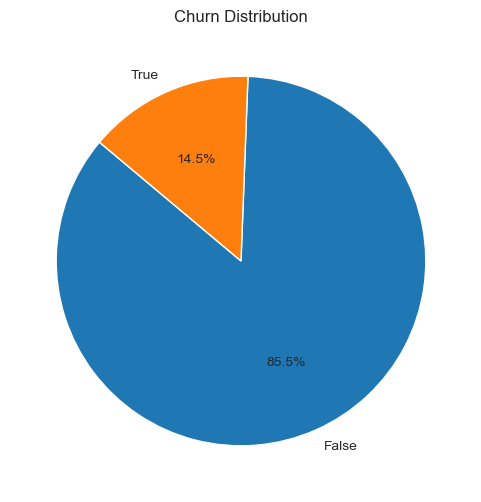

In [13]:
# Create a bar plot
churn_counts = dataset['churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

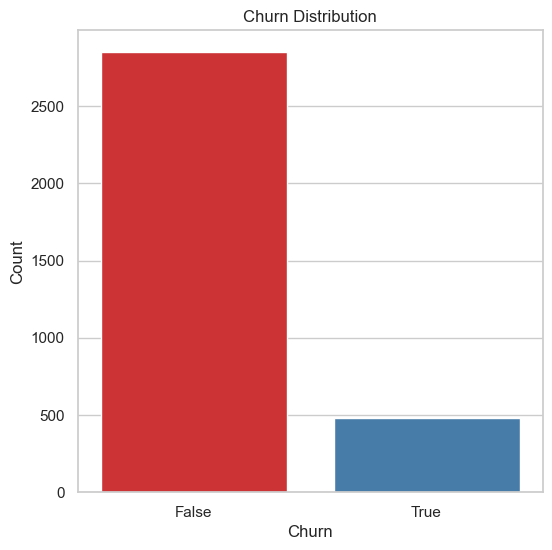

In [14]:
### Using  Seaborn libraries, Lets visualise churn parameter
# Create a countplot for the 'churn' column
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.countplot(x="churn", data=dataset, palette="Set1")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='churn', ylabel='count'>

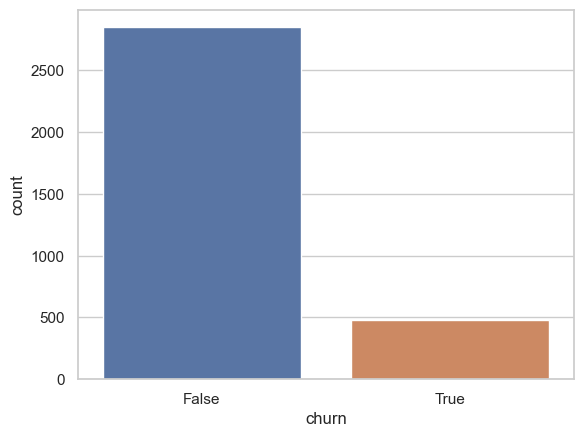

In [15]:
## Lets visualise churn parameter in another simple  code
sns.countplot(data=dataset, x='churn')

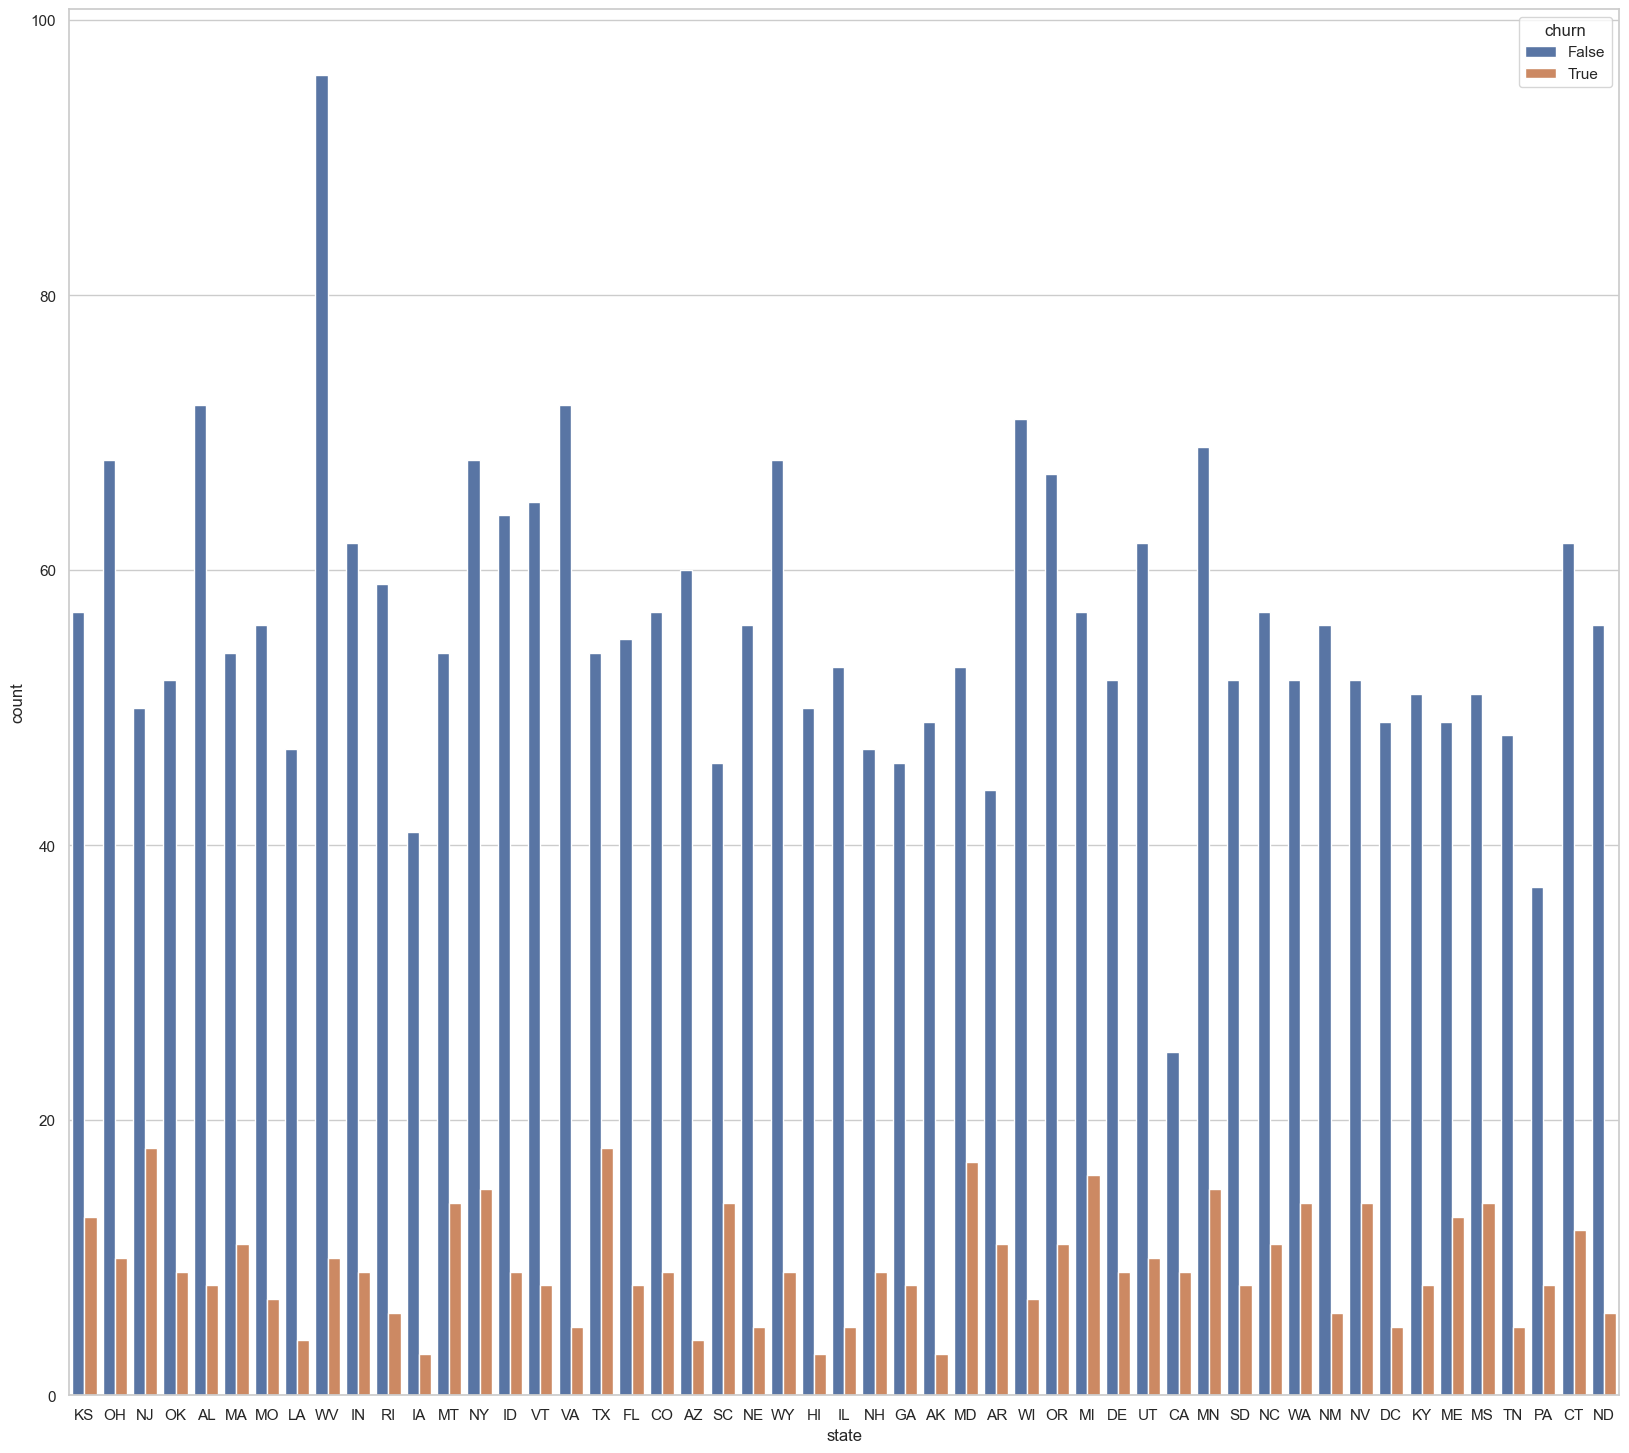

In [16]:
# Check the state against churn
plt.figure(figsize=(20,18))
sns.countplot(data=dataset, x='state',hue ='churn')

plt.show()

In [18]:
# Checkin class imbalance in the churn column: 
#To solve this I will use oversampling of the minority class and evualuate using confusion metric
dataset['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## 3. Data Preprocessing and Visualization
Ensure that the dataset is properly preprocessed, with missing values handled, datatype corrected and categorical variables encoded if necessary.

In [19]:
dataset.isnull().sum()   #Detecting the Missing Values

state                     0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [20]:
dataset.dtypes

state                      object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

In [22]:
dataset['state']= label_encoder.fit_transform(dataset['state'])
dataset['international plan']= label_encoder.fit_transform(dataset['international plan'])
dataset['voice mail plan']= label_encoder.fit_transform(dataset[ 'voice mail plan'])

In [23]:
dataset.sample(10)

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
360,5,1,0,0,257.1,53,43.71,312.2,127,26.54,183.0,82,8.24,8.8,6,2.38,1,True
1046,39,0,0,0,220.9,129,37.55,242.2,108,20.59,233.3,75,10.50,6.4,5,1.73,0,False
35,10,0,1,37,220.0,80,37.40,217.3,102,18.47,152.8,71,6.88,14.7,6,3.97,3,False
3047,3,0,0,0,172.8,81,29.38,193.4,90,16.44,89.6,107,4.03,12.8,5,3.46,2,False
1746,7,0,0,0,179.3,147,30.48,208.9,89,17.76,248.2,98,11.17,13.5,6,3.65,1,True
390,49,0,0,0,168.4,125,28.63,243.8,89,20.72,214.7,102,9.66,11.1,2,3.00,1,False
123,25,0,0,0,170.9,124,29.05,132.3,95,11.25,112.9,89,5.08,11.6,3,3.13,1,False
671,6,0,1,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
1485,26,0,0,0,133.9,87,22.76,166.4,110,14.14,193.5,139,8.71,15.4,3,4.16,1,False
204,47,0,0,0,152.7,105,25.96,257.5,80,21.89,198.1,93,8.91,9.4,4,2.54,1,False


<Axes: >

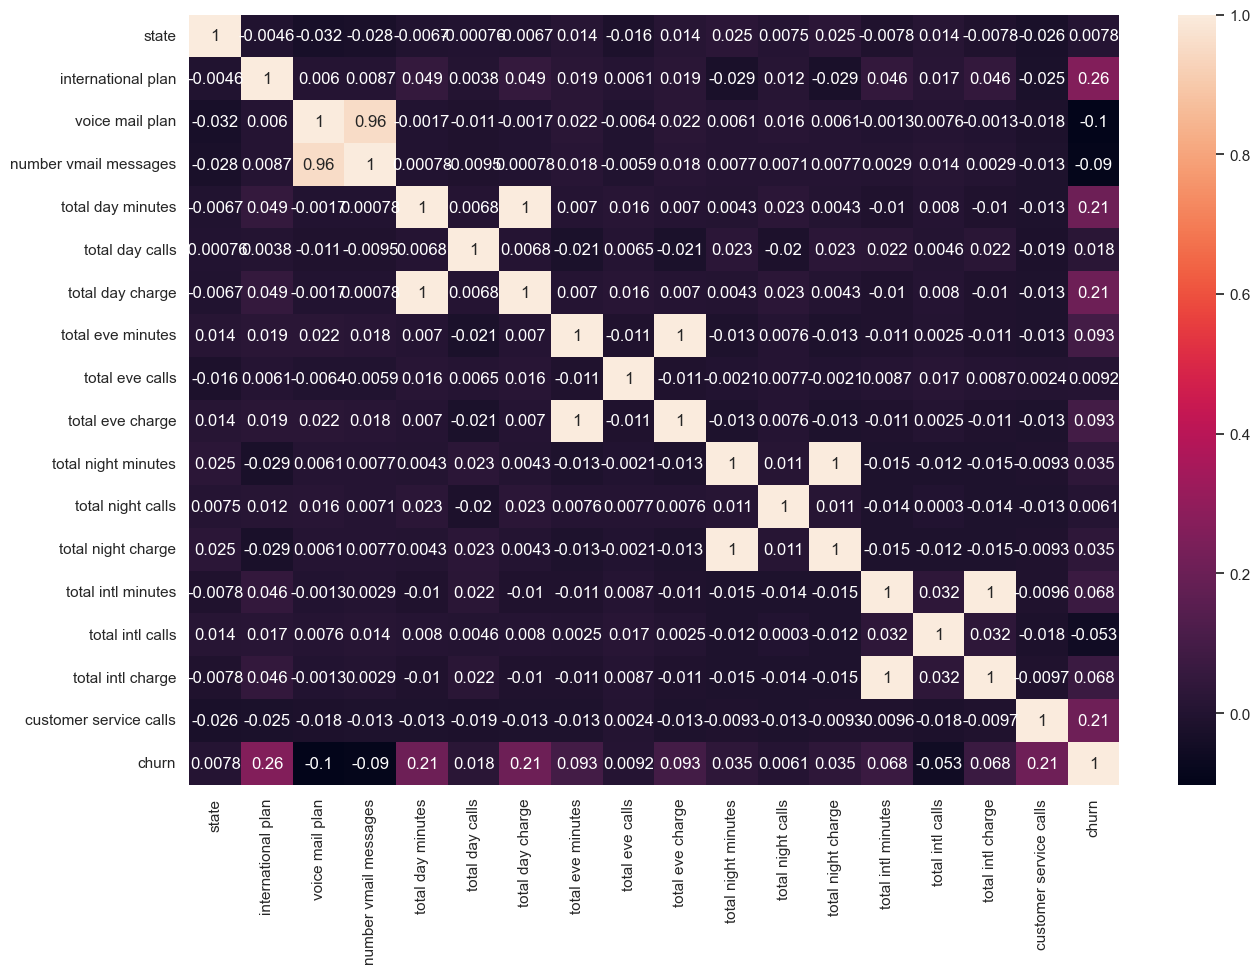

In [24]:
corr = dataset.corr()
#Plot figsize
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [25]:
# Check the  correlation between the variables and   Exited
# sorting the correlation in descending order
corr['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
total eve calls           0.009233
state                     0.007780
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

In [26]:
print(dataset.columns)   # checking the column names


Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


In [27]:
print(dataset.head(2))
print(dataset.shape)

   state  international plan  voice mail plan  number vmail messages  \
0     16                   0                1                     25   
1     35                   0                1                     26   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   

   total intl charge  customer service calls  churn  
0                2.7                       1  False  
1        

## 4. Split the dataset into training and test sets
#### 4a.Split the data into features (X) and target variable (y)

In [28]:
# Split the data into features (X) and target variable (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [29]:
X.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [30]:
print(X.shape)
print(y.shape)



(3333, 17)
(3333,)


In [31]:
print(X)
print(y)

      state  international plan  voice mail plan  number vmail messages  \
0        16                   0                1                     25   
1        35                   0                1                     26   
2        31                   0                0                      0   
3        35                   1                0                      0   
4        36                   1                0                      0   
...     ...                 ...              ...                    ...   
3328      3                   0                1                     36   
3329     49                   0                0                      0   
3330     39                   0                0                      0   
3331      6                   1                0                      0   
3332     42                   0                1                     25   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                 

In [32]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

#### 4b. Splitting the dataset into the Training set and Test set

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (2499, 17)
Shape of X_test:  (834, 17)
Shape of y_train:  (2499,)
Shape of y_test (834,)


## 5. Classification Models
####  *Define the model
####  *Fit  and train the model
#### *Predict the model
#### *Evaluate the model

## Logistic regression classifier

In [35]:
# Create a logistic regression classifier for binary  classification
classifier_lr = LogisticRegression()

# Train the classifier
classifier_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = classifier_lr.predict(X_test)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_lr)
print('Accuracy:', accuracy)

# Calculate confusion matrix
cm_LR = confusion_matrix(y_test, predictions_lr)
print('Confusion Matrix:')
print(cm_LR)

Accuracy: 0.8477218225419664
Confusion Matrix:
[[702   7]
 [120   5]]


In [37]:
# Calculate precision, recall, and F1 score
report_lr = classification_report(y_test, predictions_lr)
print('Classification Report is:')
print(report_lr)

Classification Report is:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       709
        True       0.42      0.04      0.07       125

    accuracy                           0.85       834
   macro avg       0.64      0.52      0.50       834
weighted avg       0.79      0.85      0.79       834



## Random Forest Classifier

In [38]:
#classifier_rf = RandomForestClassifier()
#classifier_rf.fit(X, y)

# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and Train the classifier
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = classifier_rf.predict(X_test)

In [39]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print('Accuracy:', accuracy_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
print('Confusion Matrix:')
print(cm_rf)

Accuracy: 0.9496402877697842
Confusion Matrix:
[[703   6]
 [ 36  89]]


In [40]:
# Calculate precision, recall, and F1 score
report_rf = classification_report(y_test, predictions_rf)
print('Classification Report is:')
print(report_rf)

Classification Report is:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       709
        True       0.94      0.71      0.81       125

    accuracy                           0.95       834
   macro avg       0.94      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



## SVM Classifier

In [41]:
# Create/define an SVM classifier
classifier_svm = SVC()

# Train the classifier
classifier_svm.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = classifier_svm.predict(X_test)



In [42]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, svm_predictions)
print('Accuracy  is:', accuracy_svm)

# Calculate confusion matrix
cm_SVM = confusion_matrix(y_test, svm_predictions)
print('Confusion Matrix:')
print(cm_SVM)

Accuracy  is: 0.8501199040767387
Confusion Matrix:
[[709   0]
 [125   0]]


In [43]:
# Calculate precision, recall, and F1 score
report_svm = classification_report(y_test, svm_predictions)
print('Classification Report:')
print(report_svm)

Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       709
        True       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ## Method 2
 ### This method allow us to be able to compare the performance of all the classifiers at once and  seee the best performing classifier

In [44]:
# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC()
lr_classifier = LogisticRegression()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate metrics for each classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

rf_precision = precision_score(y_test, rf_predictions)
svm_precision = precision_score(y_test, svm_predictions)
lr_precision = precision_score(y_test, lr_predictions)

rf_recall = recall_score(y_test, rf_predictions)
svm_recall = recall_score(y_test, svm_predictions)
lr_recall = recall_score(y_test, lr_predictions)

rf_f1_score = f1_score(y_test, rf_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:


# Create a DataFrame to display the results
data = {
    'Classifier': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, lr_recall],
    'F1 Score': [rf_f1_score, svm_f1_score, lr_f1_score]
}

df = pd.DataFrame(data)

# Set the Classifier column as the index
df.set_index('Classifier', inplace=True)

# Display the results
print(df)

                     Accuracy  Precision  Recall  F1 Score
Classifier                                                
Random Forest        0.949640   0.936842   0.712  0.809091
SVM                  0.850120   0.000000   0.000  0.000000
Logistic Regression  0.847722   0.416667   0.040  0.072993


# Using all the data for LR

In [46]:
# Create a logistic regression classifier for binary  classification
classifier_lr = LogisticRegression()

# Train the classifier
classifier_lr.fit(X, y)

# Make predictions on the test set
predictions_lr = classifier_lr.predict(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
predictions_lr 

array([False, False, False, ..., False, False, False])

In [48]:
dataset["y_pred"]=predictions_lr

In [50]:
dataset.sample(20)

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,y_pred
316,10,0,1,28,121.0,105,20.57,270.4,100,22.98,160.5,76,7.22,7.7,4,2.08,2,False,False
2380,31,0,0,0,228.6,117,38.86,132.8,123,11.29,227.2,124,10.22,10.1,2,2.73,9,True,True
686,21,0,0,0,223.2,76,37.94,214.4,131,18.22,154.4,80,6.95,10.1,2,2.73,3,False,False
2087,29,0,0,0,162.3,99,27.59,212.5,95,18.06,214.7,114,9.66,11.1,8,3.00,4,False,False
223,21,0,0,0,149.3,113,25.38,242.2,122,20.59,174.3,104,7.84,8.9,6,2.40,2,False,False
1487,44,0,1,44,230.6,94,39.20,224.1,103,19.05,244.0,76,10.98,11.1,2,3.00,0,False,False
2657,6,0,0,0,245.9,73,41.80,240.1,87,20.41,158.7,89,7.14,8.9,5,2.40,3,False,True
2571,0,0,0,0,190.9,62,32.45,226.6,53,19.26,230.1,96,10.35,7.8,3,2.11,2,False,False
1264,42,0,0,0,147.0,79,24.99,162.3,103,13.80,162.9,80,7.33,10.5,4,2.84,1,False,False
1892,48,1,0,0,225.2,111,38.28,184.9,98,15.72,143.2,146,6.44,9.9,1,2.67,0,True,False


In [51]:
# Calculate accuracy
accuracy_lr = accuracy_score(y, predictions_lr)
accuracy_lr

0.8514851485148515